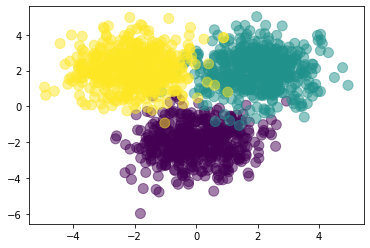

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#generate random data
n = 500
D = 2 # dimensionality of input
M1 = 10 # hidden layer 1 size
M2 = 4 # hidden layer 2 size
K = 3 # number of classes

X1 = np.random.randn(n, 2) + np.array([0, -2])
X2 = np.random.randn(n, 2) + np.array([2, 2])
X3 = np.random.randn(n, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*n + [1]*n + [2]*n)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)
plt.show()

N = len(Y)
Y_ind = np.zeros((N, K))
for i in range(N):
    Y_ind[i, Y[i]] = 1

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Iteration  0 /50: Cost:  178.86247  Error:  0.07
Iteration  10 /50: Cost:  21.321371  Error:  0.016666666666666666
Iteration  20 /50: Cost:  21.743603  Error:  0.016666666666666666
Iteration  30 /50: Cost:  21.755224  Error:  0.016666666666666666
Iteration  40 /50: Cost:  21.8506  Error:  0.016666666666666666
Iteration  50 /50: Cost:  22.071938  Error:  0.016666666666666666


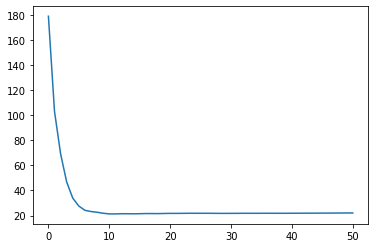

In [0]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

def error_rate(p, t):
    return np.mean(p != t)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_ind, test_size=0.2)

lr = 0.001
reg = 0.01

batch_size = 250
n_batches = N//batch_size

W1_init = np.random.randn(D, M1)/np.sqrt(M1)
W2_init = np.random.randn(M1, M2)/np.sqrt(M2)
W3_init = np.random.randn(M2, K)/np.sqrt(K)
b1_init = np.zeros(M1)
b2_init = np.zeros(M2)
b3_init = np.zeros(K)

#data as tf variables
X = tf.placeholder(tf.float32, shape=(None, D), name='X')
T = tf.placeholder(tf.float32, shape=(None, K), name='T')

#weights as tf variables
W1 = tf.Variable(W1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

#model definition
Z1 = tf.nn.relu(tf.matmul(X, W1) + b1)
Z2 = tf.nn.relu(tf.matmul(Z1, W2) + b2)
Yish = tf.matmul(Z2, W3) + b3

#define expressions
cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Yish, labels=T))
train_op = tf.train.RMSPropOptimizer(lr, decay=0.99, momentum=0.9).minimize(cost)
predict_op = tf.argmax(Yish, 1)

#main training loop
costs = []
init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)

    for i in range(51):
        for j in range(n_batches):
            X_batch = X_train[j*batch_size:(j*batch_size + batch_size),]
            Y_batch = Y_train[j*batch_size:(j*batch_size + batch_size),]

            session.run(train_op, feed_dict={X: X_batch, T: Y_batch})
        
        cost_val = session.run(cost, feed_dict={X: X_test, T: Y_test})
        costs.append(cost_val)
        if i%10 == 0:
            preds = session.run(predict_op, feed_dict={X: X_test})
            targets = np.argmax(Y_test, axis=1)
            error = error_rate(preds, targets)
            print('Iteration ', i ,'/50: Cost: ', cost_val, ' Error: ', error)

plt.plot(costs)
plt.show()